In [2]:
# read yolov5 folder
%cd yolov5

D:\computer science\Material\semester6\Pattern Recognation\Project\Phase 2\Dataset\yolov5


In [3]:
%matplotlib inline
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import glob
import io
import os
import numpy as np
from xml.dom.minidom import parse
import shutil
from urllib.request import urlopen, Request
from urllib.parse import urlparse
from PIL import Image
from PIL.Image import Image as PilImage
import matplotlib
import torch.distributed as dist
import tensorboard
from tqdm import tqdm
from models.experimental import attempt_load
from IPython.display import Image, clear_output
import pytesseract
import matplotlib.image as mpimg
from cv2 import cv2
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
matplotlib.use('TkAgg')

## get detected ALPR bounding box

In [4]:
glob.glob("runs/detect/exp/*")


['runs/detect/exp\\Cars106_png.rf.b46117d559aba3da9689675bb3440224.jpg',
 'runs/detect/exp\\Cars114_png.rf.c910a82766e1b952757f31c12c3a3098.jpg',
 'runs/detect/exp\\Cars11_png.rf.a245f101f19d6643708fb73624d8860c.jpg',
 'runs/detect/exp\\Cars123_png.rf.36e41fc7bef85cdc48f0f8d5aaa05ce3.jpg',
 'runs/detect/exp\\Cars158_png.rf.fc5cdc6ebd7491393ff6adb3bb08e00f.jpg',
 'runs/detect/exp\\Cars167_png.rf.e258ac473ae64a8f4162724da6881e2f.jpg',
 'runs/detect/exp\\Cars173_png.rf.9d82bd0a6b592f4dccedab58b51b3e56.jpg',
 'runs/detect/exp\\Cars184_png.rf.e59f938466e2e3731b1e4372213fc7c8.jpg',
 'runs/detect/exp\\Cars209_png.rf.92870116e0ed866cb2971c58d6ff25e0.jpg',
 'runs/detect/exp\\Cars213_png.rf.d0e2a1e7047bc807b9f42f49f1677642.jpg',
 'runs/detect/exp\\Cars238_png.rf.42a3277c4646bd4cbac5eff65ceda148.jpg',
 'runs/detect/exp\\Cars23_png.rf.abcc7c2b8bff875346ebd24bf6535e27.jpg',
 'runs/detect/exp\\Cars244_png.rf.1f29428fadee5336a090933345548e3a.jpg',
 'runs/detect/exp\\Cars248_png.rf.a0dac25b5e837e6df25


# OCR using PyTesseract

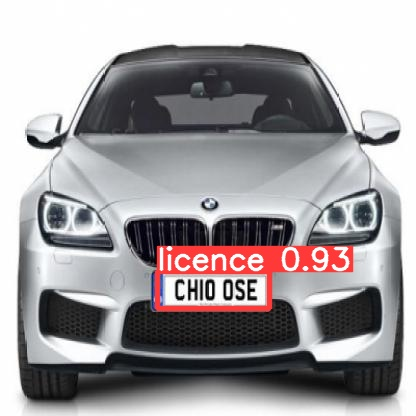

In [5]:
photos = os.listdir('runs/detect/exp/')
image_path = 'runs/detect/exp/'
IMG_NAME = "Cars53_png.rf.b48d9a80955f1a386cc5c387984c43f9"+".jpg"
#IMG_NAME = photos[1]
Image(image_path+IMG_NAME)

In [6]:
img = cv2.imread(image_path+IMG_NAME)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = mpimg.imread(image_path+IMG_NAME)
#plt.imshow(img)
#plt.axis('Off')
# plt.show()
width, height, n_chaneel = img.shape
width, height

(416, 416)

In [1]:
def read_txt(file):
    with open(file) as f:
        l = f.readlines()
        l = [list(map(float,i.strip().split())) for i in l]
        return l

In [8]:
img = cv2.imread(image_path+IMG_NAME)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lics = read_txt(image_path +'labels/'+IMG_NAME.replace(".jpg","")+'.txt')

for lic in lics:
    c, x, y, w, h = lic
    x,y,w,h=x*width, y*height, w*width, h*height
    print(y-int(h/2),y+int(h/2),x-int(w/2),x+int(w/2))
    # center of the bounding box
    img_alpr = img1[int(y-int(h/2)):int(y+int(h/2)),int(x-int(w/2)):int(x+int(w/2))]
    txt = pytesseract.image_to_string(img_alpr)
    plt.imshow(img_alpr)
    #plt.axis('off')
    plt.show()
    print("plate number:",txt)

271.49980800000003 307.49980800000003 156.99990400000002 268.999904
plate number: | CHIO OSE

